In [2]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np

# import os
# import sys
# sys.path.insert(0, os.path.abspath('/home/gaspar/git/pyha'))

## Modulated signal
Lets use previously developed FSK modulator component to first synthesize a testing signal.

<IPython.core.display.Javascript object>


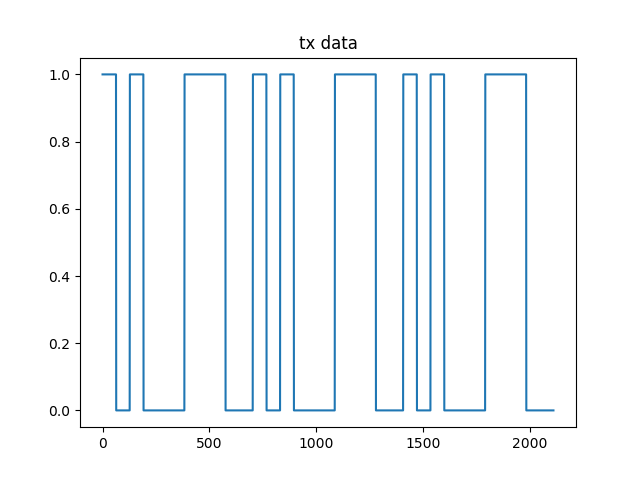

<IPython.core.display.Javascript object>


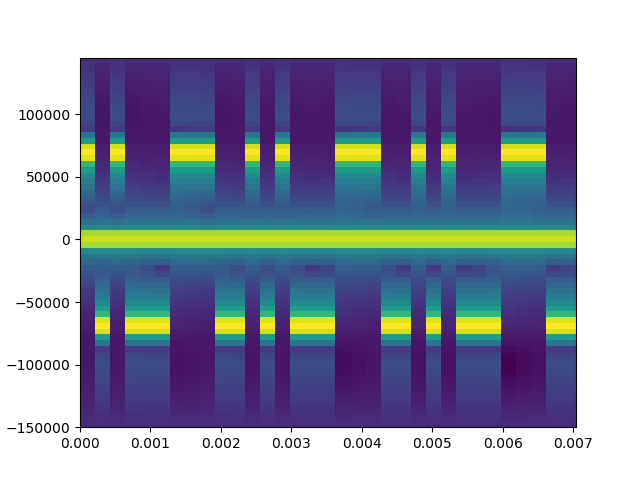

In [6]:
from pyha.components.fsk_modulator import FSKModulator
samples_per_symbol = 64 # this is so high to make stuff plottable
symbols = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0]

data = []
for x in symbols:
    data.extend([x] * samples_per_symbol)
    
plt.plot(data)
plt.title('tx data')
plt.show()

fs = 300e3
deviation = 70e3
mod = FSKModulator(deviation, fs)

tx_signal = mod.model_main(data)

# awgn channel (add some noise)
tx_signal = tx_signal + np.random.normal(scale=np.sqrt(0.5))

Pxx, freqs, bins, im = plt.specgram(tx_signal, Fs=fs, NFFT=64, noverlap=0)
plt.show()

## Demodulator

We use quadrature demodulator to turn RF back to data. Result is noisy, because we added quite a bit of noise to the TX signal.

<IPython.core.display.Javascript object>


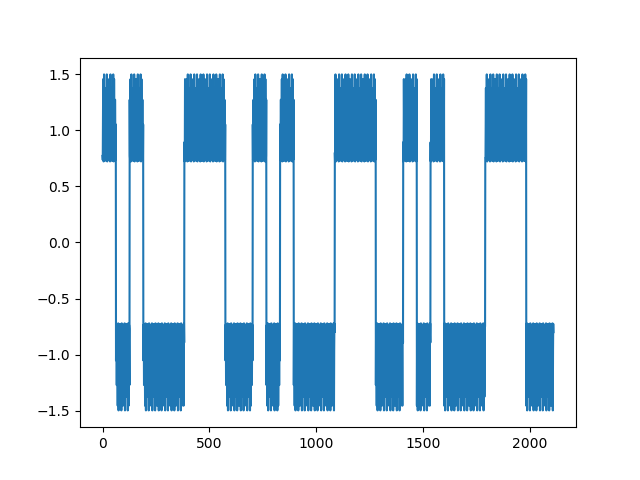

In [7]:
gain = fs / (2 * np.pi * deviation)
demod = np.angle(tx_signal[1:] * np.conjugate(tx_signal[:-1]))
rx_demod = gain * demod

plt.plot(rx_demod)
# plt.plot(data)
plt.show()

# Matched filtering
Noise situation can be improved by using matched filtering.

<IPython.core.display.Javascript object>


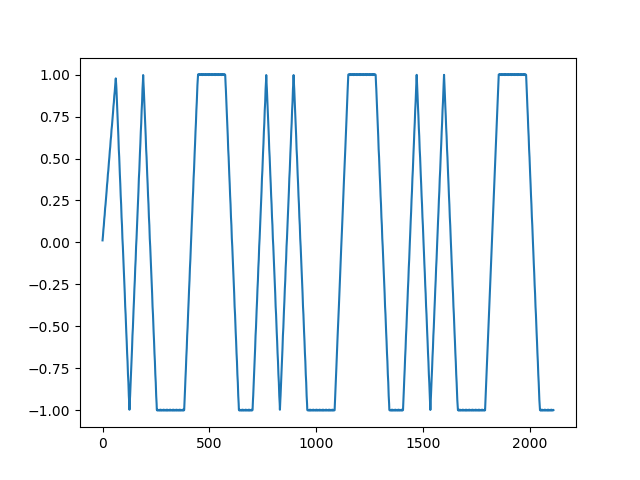

In [8]:
from pyha.components.moving_average import MovingAverage
mf = MovingAverage(window_len=samples_per_symbol)

rx_matched = mf.model_main(rx_demod)

plt.plot(rx_matched)
plt.show()

# Timing recovery
Next step is to figure out correct time instances when to sample for a bit. Will be using M&M clock recovery for the job.
TODO